ppo_baseline_run0/phase2/dense_logs/logs_0000000009600000
_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 _____|_ Agent  3 ____
Cost (Wood)    :   3.01 (n= 77) |   3.00 (n=  3) |   4.00 (n=  3) |   2.67 (n=  3)
Cost (Stone)   :   4.00 (n= 83) |   3.00 (n=  6) |   3.33 (n=  6) |   3.00 (n=  2)

Income (Wood)  :   3.50 (n=  2) |   3.14 (n= 22) |   3.00 (n= 59) |   2.67 (n=  3)
Income (Stone) :    ~~~~~~~~    |   3.80 (n=  5) |   4.03 (n= 31) |   3.80 (n= 61)
Income (Build) :  22.25 (n= 99) |    ~~~~~~~~    |  16.47 (n=  8) |    ~~~~~~~~   


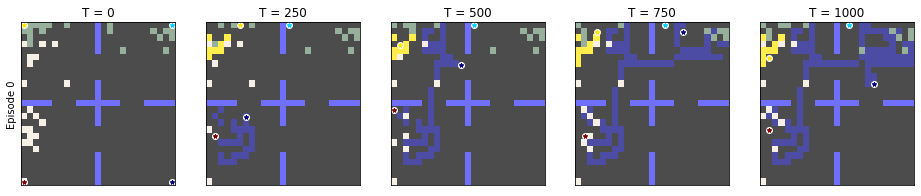

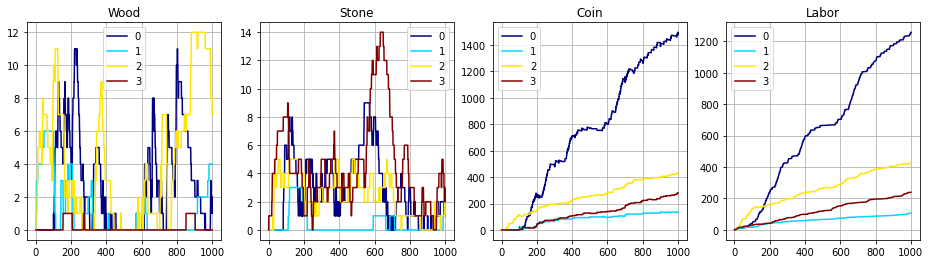

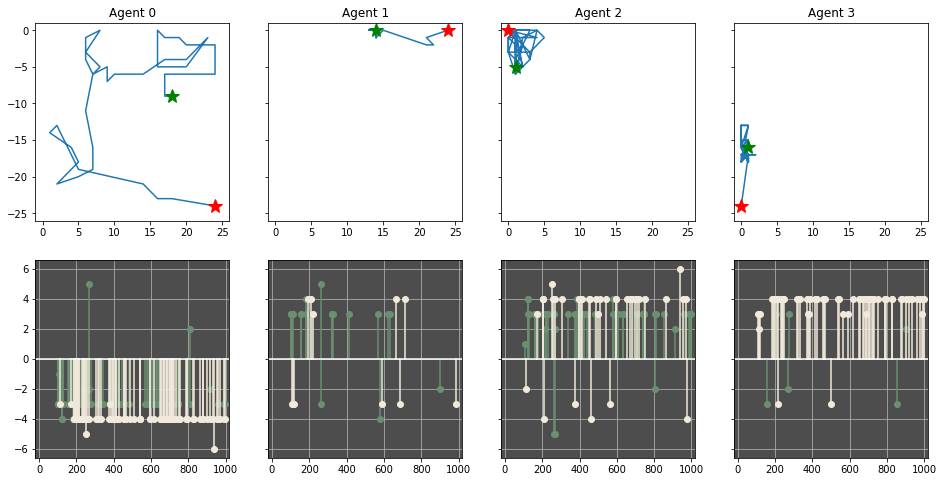

In [43]:
%matplotlib inline

from ai_economist.foundation import utils
from utils import plotting
from pathlib import Path

# exp_dir = Path("ppo_baseline_run0/phase2")
root_dir = Path("ppo_baseline_run0")
exp_dir = root_dir / "phase2"

assert exp_dir.exists()
ps = [(p, int(str(p).split("_")[-1])) for p in (exp_dir / "dense_logs").glob("*")]
sorted_ps = sorted(ps, key=lambda x: x[1])
assert len(sorted_ps) > 0
most_recent = sorted_ps[-1][0]
print(most_recent)

log = utils.load_episode_log(most_recent / "env000.lz4")
figs, _, _, _, _ = plotting.breakdown(log)
for i, f in enumerate([figs[0], figs[1], figs[2]]):
    f.savefig(root_dir / f"fig-{i}.png")

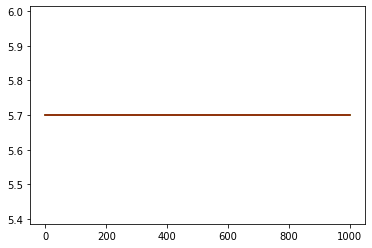

In [8]:
import matplotlib.pyplot as plt

n = 4

cmap = plt.get_cmap("jet", n)
for agent in range(n):
    plt.plot(
        [x[str(agent)]['build_payment'] for x in log["states"]],
        label=agent,
        color=cmap(agent)
    )

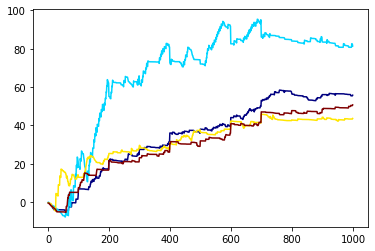

In [32]:
# plot rewards per agent
n = 4

def cumm_reward(reward_arr):
    res = []
    acc = 0.0
    for r in reward_arr:
        acc += r
        res.append(acc)
    return res

cmap = plt.get_cmap("jet", n)
for agent in range(n):
    plt.plot(
        cumm_reward([x[str(agent)] for x in log['rewards']]),
        label=agent,
        color=cmap(agent),
    )

In [112]:
import json
from pathlib import Path

p = Path("/home/ubuntu/public/test0.json")
with p.open("w") as f:
    json.dump(log, f)

In [71]:
list(filter(lambda x: x != [], log['MoveGather']))

[[{'agent': 3, 'resource': 'Wood', 'n': 1.0, 'loc': [0, 4]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 3.0, 'loc': [0, 3]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 2.0, 'loc': [0, 2]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 4.0, 'loc': [0, 1]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 5.0, 'loc': [1, 1]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 6.0, 'loc': [2, 1]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 8.0, 'loc': [3, 1]}],
 [{'agent': 3, 'resource': 'Stone', 'n': 8.0, 'loc': [5, 1]}],
 [{'agent': 3, 'resource': 'Stone', 'n': 9.0, 'loc': [6, 1]}],
 [{'agent': 3, 'resource': 'Stone', 'n': 10.0, 'loc': [5, 2]}],
 [{'agent': 3, 'resource': 'Stone', 'n': 9.0, 'loc': [3, 3]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 12.0, 'loc': [1, 3]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 12.0, 'loc': [0, 3]}],
 [{'agent': 3, 'resource': 'Wood', 'n': 15.0, 'loc': [0, 4]}],
 [{'agent': 2, 'resource': 'Wood', 'n': 2.0, 'loc': [0, 0]}],
 [{'agent': 3, 'resource': 'Stone', 'n': 17.0, 'loc': [3, 5]}]

In [6]:
import pickle

latest_checkpoint_pkl = exp_dir / "ckpts" / "game_object_000.pkl"
env = pickle.load(latest_checkpoint_pkl.open("rb"))
for i, agent in enumerate(env.world.agents):
    print(i, agent.state["build_payment"])

0 2.9
1 2.9
2 2.9
3 2.9
